## AICHE 2025

Poster and presentation plots

In [1]:
import os
import glob
import matplotlib               # type: ignore
import numpy             as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.colors as mcolors
import platform
from   pathlib           import Path
import importlib
#import readFiles
import src.readFiles as readFiles

import seaborn as sns
import pandas as pd
from tqdm import tqdm
import networkx as nx
#importlib.reload(readFiles)

plt.rcParams.update({
    'figure.max_open_warning': 0,
    'text.usetex':             True,
    'text.latex.preamble':     r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
    'figure.autolayout':       True,
    'font.family':             "STIXGeneral",
    'mathtext.fontset':        "stix",
    'font.size':               8,
    'axes.titlesize':          8,
    'axes.labelsize':          11,           # x and y label font size
    'axes.labelweight':        'bold',       # make axis labels bold
    'figure.titlesize':        8,
    'legend.frameon':          False,
    'legend.framealpha':       0.6,
    'legend.fancybox':         True,
    'axes.grid':               False,
    'axes.grid.axis':          'both',
    'grid.alpha':              0.2,
    'grid.linewidth':          0.4,
    'xtick.labelsize':         10,
    'ytick.labelsize':         10,
    'lines.linewidth':         1,
    'lines.markersize':        3,
    'savefig.transparent':     True,
    'savefig.pad_inches':      0.1,
    'savefig.format':          'pdf',
    'savefig.bbox':            'tight'
})

plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']


if platform.system() == 'Darwin':  # macOS
    topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/AICHE_2025/figures/")
elif platform.system() == 'Linux':
    topDir = Path("/media/rahul/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/AICHE_2025/figures/")
else:
    raise OSError("Unsupported OS")

In [2]:
## Flow curve

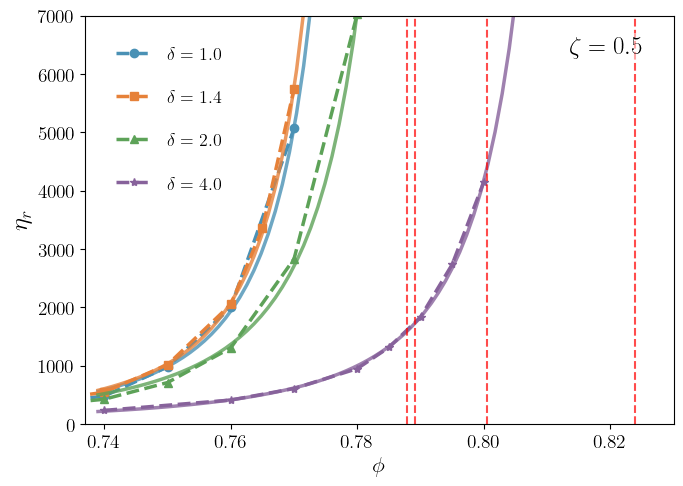

In [17]:
# maron pierce all plots
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -c)

#cmap = matplotlib.colormaps['viridis_r'] #color scheme
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = '0.5'
numRuns = 2
off     = 100
phim    = []
cvals   = []
k_guess = [.785,.785,.792,0.815]
           # initial guess for max phi (phim)

fig, ax = plt.subplots(1, 1, figsize=(990/72/2, 707/72/2))

#for i, vri in enumerate(vrr):
rerr    = [] # r2 error
phims   = [] # max phi calculated from fitting
c_list  = []
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            #vrj = '0.25' if arj == 1 else vri
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr}/run_{run+1}/"
            if os.path.exists(workDir):
                #print(workDir)
                dataFile = glob.glob(workDir+"data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
        visc.append(np.mean(visc_list) if visc_list else np.nan) 

    visc_filtered     = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

    # curve fit
    popt, pcov   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,[1,k_guess[j]])
    c_opt, k_opt = popt
    phims.append(k_opt)
    ax.plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], 
               #label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), 
               label=r'$\delta = {:.1f}$'.format(arj,k_opt), 
               color=colors[j],linewidth=2.5, markersize=6)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.739, .85, 100)
    yy = maronpierce(xx,c_opt,k_opt)
    ax.plot(xx, yy, color = colors[j], linewidth=2.5, alpha = 0.8)
        
phim.append(phims)
cvals.append(c_list)

#ax[i].grid(which='Both', alpha=0.2)
ax.set_xlim(.737, .83)
ax.set_ylim(0, 7e3)
ax.set_xlabel(r'$\phi$', fontsize=16,fontstyle='italic')
ax.tick_params(axis='x', labelsize=14)
ax.legend(loc='upper left', fontsize=13, labelspacing=1.5, borderpad=1.2)
#ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
ax.text(0.95, 0.95, fr'$\zeta = {vrr}$', 
           fontsize=18,
           ha='right', va='top',            # Align text to top-right
           transform=ax.transAxes,       # Use axes coordinates (0-1)
           bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
    
# plot parameters
ax.set_ylabel(r'$\eta_{r}$', fontsize=18,fontstyle='italic')
ax.tick_params(axis='y', labelsize=14)
# ax.set_yticks([])
# ax.set_yticks([])

fig.tight_layout()

figsave=True
if figsave:
    plt.savefig(f'{fig_save_path}/Maron_Pierce_fit_power_law.pdf', bbox_inches="tight",dpi=500)

for xpos in phims:
    plt.axvline(x=xpos, color='r', linestyle='--', linewidth=1.5, alpha=0.7)

if figsave:
    plt.savefig(f'{fig_save_path}/Maron_Pierce_fit_with_phim.pdf', bbox_inches="tight",dpi=500)
plt.show()

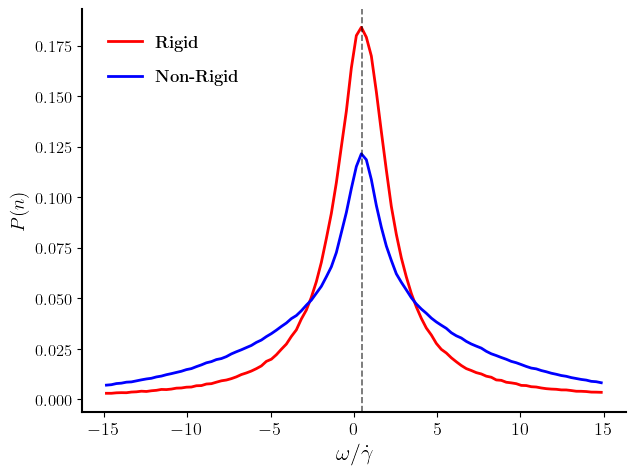

In [16]:
# angular velocity for rigid and non rigid particles
## angular velocity distribution normalised wrt the instantaneous shear rate

plt.rcParams["text.usetex"]         = True
#plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"  
#plt.rcParams["figure.autolayout"]   = True

npp     = 1000
phi     = 0.765
ar      = '1.4'
vr      = '0.25'
numRuns = 2
off     = 100
wRange  = 15 # range of angular velocity for histogram

particleFile  = 'par_*.dat'
dataFile      = 'data_*.dat'
rigFile       = 'rig_*.dat'
cmap          = plt.get_cmap("coolwarm")
#cmap         = plt.get_cmap("viridis",  len(phi))

angVelAll1, angVelAll2 = [], []
phir     = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
dataname = f"{topDir}/NP_{npp}/phi_{phir}/ar_{ar}/Vr_{vr}"

if os.path.exists(dataname):
    for k in range(numRuns):
        par_file = glob.glob(f'{dataname}/run_{k+1}/{particleFile}')[0]
        dat_file = glob.glob(f'{dataname}/run_{k+1}/{dataFile}')[0]
        rig_file = glob.glob(f'{dataname}/run_{k+1}/{rigFile}')[0]
        
        if par_file and rig_file:
            data    = np.loadtxt(dat_file)
            parList = readFiles.readParFile(open(par_file))
            rigList = readFiles.rigList(open(rig_file))
            srate   = data[:, 2]
            
            for frame in range(off, len(parList)):
                frameList      = parList[frame]
                rigParts       = [i for sublist in rigList[frame] for i in sublist]
                nonRigParts    = list(set(np.arange(npp)) - set(rigParts))
                angVelyRig     = frameList[rigParts,    8]/srate[frame] #nomalised
                angVelyNonRig  = frameList[nonRigParts, 8]/srate[frame] #nomalised
                angVelAll1.extend(angVelyRig)
                angVelAll2.extend(angVelyNonRig)
                
    angVelAllRig    = np.array(angVelAll1)
    hist, bins      = np.histogram(angVelAllRig, bins=100, range=(-wRange, wRange), density=True)
    bin_centers     = 0.5 * (bins[:-1] + bins[1:])
    plt.plot(bin_centers, hist, label = r'\textbf{Rigid}', color = 'red', linewidth=2)
   
    angVelAllNonRig = np.array(angVelAll2)
    hist, bins      = np.histogram(angVelAllNonRig, bins=100, range=(-wRange, wRange), density=True)
    bin_centers     = 0.5 * (bins[:-1] + bins[1:])
    plt.plot(bin_centers, hist, label = r'\textbf{Non-Rigid}', color = 'blue', linewidth=2)

plt.axvline(x=0.5, color='k', linestyle='--', linewidth=1.2, alpha=0.6)
#plt.axvline(x=0.0, color='k', linestyle='--', linewidth=1.2, alpha=0.6)

plt.xlabel(r'$\omega/ \dot \gamma$', fontsize=16, fontweight='bold')
plt.ylabel(r'$P(n)$', fontsize=14, fontweight='bold')
#plt.title(fr'$\phi = {phi}, \; \delta = {ar}, \; \zeta = {float(vr):.2f}$', fontsize=16)
plt.legend(fontsize=12, loc='upper left', labelspacing=1.2, borderpad=1.1, framealpha=0.5, ncol=1)
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
#plt.grid(True, alpha=0.2)
plt.grid(False)

ax = plt.gca()  # get current axes

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.savefig(f'{fig_save_path}/angVel_rigid_phi_{phir}ar_{ar}_vr_{vr}.pdf', bbox_inches="tight", dpi=400)
plt.show()

[0.71, 0.73, 0.75, 0.77, 0.78]


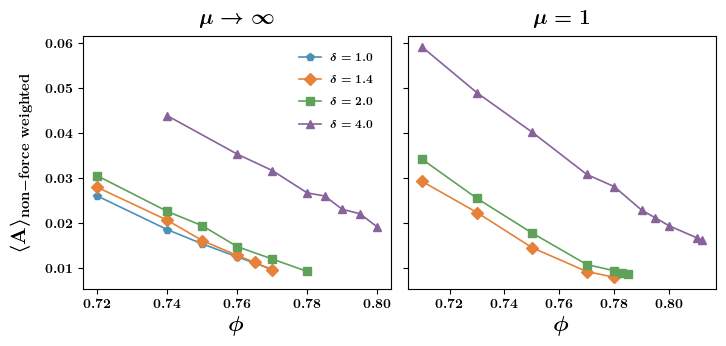

In [10]:
## plotting
## mu =1 and mu =inf

## Reading pickle
#not force weighted

import pickle

# Path to the pickle file
save_path = f'{fig_save_path}/anisotropy_not_force_weighted.pkl'

# Load the pickle
with open(save_path, 'rb') as f:
    loaded_data = pickle.load(f)

# Access the lists
phim_mu_1   = loaded_data['phim_mu_1']
phi_mu_1    = loaded_data['phi_mu_1']
a_mu_1      = loaded_data['a_mu_1']
phim_mu_inf = loaded_data['phim_mu_inf']
phi_mu_inf  = loaded_data['phi_mu_inf']
a_mu_inf    = loaded_data['a_mu_inf']

# Example: print the first element of phi_mu_1
print(phi_mu_1[0])

vrr  = '0.5'
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(7.3,3.5))

# mu = 1 plots
arr  = [1.4, 2.0, 4.0] # no delta =1 for mu =1
for i in range(len(a_mu_1)):
    ax[1].plot(phi_mu_1[i], a_mu_1[i], color=colors[i+1],
               label=fr'$\delta = {arr[i]}$', linewidth=1.2,
               marker=marker_shape[i+1], markersize=6)


# mu = ∞ plots
arr  = [1.0, 1.4, 2.0, 4.0]
for i in range(len(a_mu_inf)):
    ax[0].plot(phi_mu_inf[i], a_mu_inf[i], color=colors[i],
               label=fr'$\delta = {arr[i]}$', linewidth=1.2,
               marker=marker_shape[i], markersize=6)

# titles
ax[1].set_title(r"$\mathbf{\mu = 1}$", fontsize=15, pad=8)
ax[0].set_title(r"$\mathbf{\mu \to \infty}$", fontsize=15, pad=8)

# legend only on second plot
ax[0].legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

# labels
ax[1].set_xlabel(r'$\phi$', fontsize=16, fontweight='bold')
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontweight='bold')
ax[0].set_ylabel(r'$\langle \mathbf{A}\rangle_{\mathrm{non-force \;weighted}} $', fontsize=15, fontweight='bold', labelpad =10)
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

# ticks
ax[0].tick_params(axis='y', labelleft=True)   # y numbers ON for left plot
ax[1].tick_params(axis='y', labelleft=False)  # y numbers OFF for right plot

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/anisotropy_mu_1_non_force_weighted{figFormat}', bbox_inches="tight",dpi=800)

[0.71, 0.73, 0.75, 0.77, 0.78]


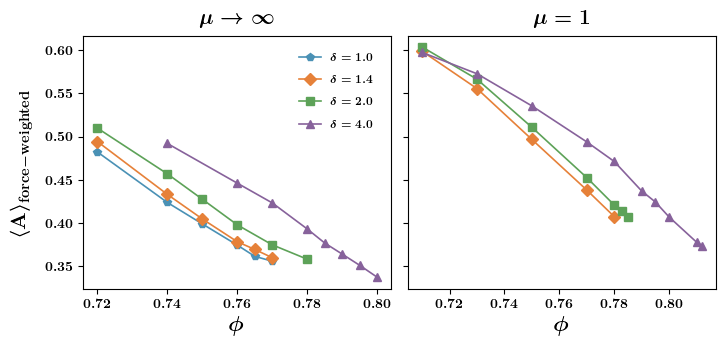

In [11]:
## Reading pickle

import pickle
save_path     = f'{fig_save_path}/anisotropy_force_weighted.pkl'

# Load the pickle
with open(save_path, 'rb') as f:
    loaded_data = pickle.load(f)

# Access the lists
phim_mu_1   = loaded_data['phim_mu_1']
phi_mu_1    = loaded_data['phi_mu_1']
a_mu_1      = loaded_data['a_mu_1']
phim_mu_inf = loaded_data['phim_mu_inf']
phi_mu_inf  = loaded_data['phi_mu_inf']
a_mu_inf    = loaded_data['a_mu_inf']
#eigvec_all  = loaded_data['eigvec_all']

# Example: print the first element of phi_mu_1
print(phi_mu_1[0])


## plotting with force weighting
## mu =1 and mu =inf

vrr  = '0.5'
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(7.3,3.5))

# mu = 1 plots
arr  = [1.4, 2.0, 4.0] # no delta =1 for mu =1
for i in range(len(a_mu_1)):
    ax[1].plot(phi_mu_1[i], a_mu_1[i], color=colors[i+1],
               label=fr'$\delta = {arr[i]}$', linewidth=1.2,
               marker=marker_shape[i+1], markersize=6)

# mu = ∞ plots
arr  = [1.0, 1.4, 2.0, 4.0]
for i in range(len(a_mu_inf)):
    ax[0].plot(phi_mu_inf[i], a_mu_inf[i], color=colors[i],
               label=fr'$\delta = {arr[i]}$', linewidth=1.2,
               marker=marker_shape[i], markersize=6)

# titles
ax[1].set_title(r"$\mathbf{\mu = 1}$", fontsize=15, pad=8)
ax[0].set_title(r"$\mathbf{\mu \to \infty}$", fontsize=15, pad=8)

# legend only on second plot
ax[0].legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

# labels
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontweight='bold')
ax[1].set_xlabel(r'$\phi$', fontsize=16, fontweight='bold')
ax[0].set_ylabel(r'$\langle \mathbf{A}\rangle_{\mathrm{force-weighted}} $', fontsize=15, fontweight='bold', labelpad=10)
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

# ticks
ax[0].tick_params(axis='y', labelleft=True)   # y numbers ON for left plot
ax[1].tick_params(axis='y', labelleft=False)  # y numbers OFF for right plot

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/anisotropy_mu_1_inf_force_weighted{figFormat}', bbox_inches="tight",dpi=800)